# Ch.06 차원축소

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

## 공분산 행렬

In [4]:
from sklearn.preprocessing import StandardScaler

iris_std = StandardScaler().fit_transform(iris.data)
iris_std[:3,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [8]:
#모집단

iris_cov = np.dot(iris_std.T,iris_std)/len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [9]:
#표본집단

iris_cov1 = np.dot(iris_std.T,iris_std)/(len(iris_std)-1)
iris_cov1

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
#넘파이에서 주는 공분산 행렬

np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [14]:
eig_vals, eig_vexs = np.linalg.eig(iris_cov)

In [15]:
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [16]:
eig_vexs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [17]:
PC1 = iris_std.dot(np.reshape(eig_vexs.T[0], (4,1)))
PC2 = iris_std.dot(np.reshape(eig_vexs.T[1], (4,1)))

In [18]:
PC1[:3]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905]])

In [19]:
# 사이킷런 수행 결과와 비교할 때 부호가 반대로 되나 무방함
PC2[:3]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802]])

## PCA 변환

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [21]:
iris_pca[:3,:]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

### 6.2 PCA(Principal Component Analysis)

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


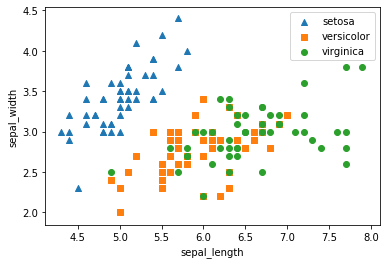

In [31]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)


(150, 2)


In [35]:
pca_columns = ['pca_compnent_1', 'pca_compnent_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_compnent_1,pca_compnent_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


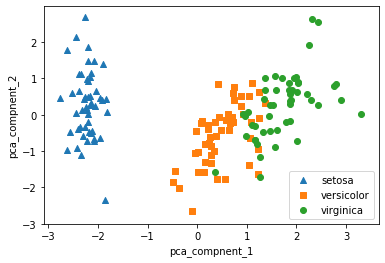

In [38]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_compnent_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_compnent_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
    
plt.legend()
plt.xlabel('pca_compnent_1')
plt.ylabel('pca_compnent_2')
plt.show()

In [41]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state =156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring = 'accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도 :',scores)
print('원본 데이터 평균 정확도 :',np.mean(scores))

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96


In [42]:
pca_X = irisDF_pca[['pca_compnent_1','pca_compnent_2']]
scores_pca =cross_val_score(rcf, pca_X, iris.target, scoring='accuracy',cv=3)
print('PCA변환 데이터 교차 검증 개별 정확도 :',scores_pca)
print('PCA변환 데이터 평균 정확도 :',np.mean(scores_pca))

PCA변환 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
PCA변환 데이터 평균 정확도 : 0.88
